<a href="https://colab.research.google.com/github/vbanai/Unsupervised-learning-Clustering-GANS-Autoencoder/blob/main/Autoencoder_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

In [ ]:
path="."
os.chdir(path)
os.makedirs("train")
os.makedirs("valid")
os.makedirs("test")

path="./train"
os.chdir(path)
os.makedirs("horse")
os.makedirs("dolphin")
os.makedirs("dolphin_horse")

path="/content/valid"
os.chdir(path)
os.makedirs("horse")
os.makedirs("dolphin")
os.makedirs("dolphin_horse")

path="/content/test"
os.chdir(path)
os.makedirs("horse")
os.makedirs("dolphin")
os.makedirs("dolphin_horse")

!pip install pyunpack
!pip install patool
from pyunpack import Archive

Archive('/content/drive/MyDrive/dolphin_train.rar').extractall('/content/train/dolphin/')
Archive('/content/drive/MyDrive/horse_train.rar').extractall('/content/train/horse/')
Archive("/content/drive/MyDrive/dolphin_horse_train.rar").extractall('/content/train/dolphin_horse/')
Archive('/content/drive/MyDrive/horse_valid.rar').extractall('/content/valid/horse/')
Archive('/content/drive/MyDrive/dolphin_valid.rar').extractall('/content/valid/dolphin/')
Archive('/content/drive/MyDrive/dolphin_horse_valid.rar').extractall('/content/valid/dolphin_horse/')
Archive('/content/drive/MyDrive/DolphinTest.rar').extractall('/content/test/dolphin/')
Archive('/content/drive/MyDrive/HorseTest.rar').extractall('/content/test/horse/')
Archive("/content/drive/MyDrive/DolphinHorseTest.rar").extractall('/content/test/dolphin_horse/')

In [2]:

datadir="/content/train/" 
train_categories=['dolphin/dolphin_train/']

dataset_train=[]
def create_train_data():
  for category in train_categories:
    path_train=os.path.join(datadir, category)
    if category=="horse/horse_train/":
      class_num_train=[1,0]
    if category=="dolphin/dolphin_train/":
      class_num_train=[0,1]
    if category=="dolphin_horse/dolphin_horse_train/":
      class_num_train=[1,1]
    for img in os.listdir(path_train):  
      try:
        img_array=cv2.imread(os.path.join(path_train, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (64, 64))  
        new_array1=new_array/255 
        dataset_train.append([new_array1, class_num_train])
      except Exception as e:
        print(e)

create_train_data()

import random
random.shuffle(dataset_train)

inputs_train=[]
targets_train=[]

for image, label in dataset_train:
  inputs_train.append(image)
  targets_train.append(label)

#---creating np array from the input images
arr_inputs_train = np.array(inputs_train)
arr_inputs_float_train=arr_inputs_train.astype('float32')


arr_inputs_train_targets = np.array(targets_train)
arr_inputs_float_train_targets=arr_inputs_train_targets.astype('float32')




datadir="/content/valid/" 
valid_categories=['dolphin/dolphin_valid/']

dataset_valid=[]
def create_validation_data():
  for category in valid_categories:
    path_valid=os.path.join(datadir, category)
    if category=="horse/horse_valid/":
      class_num_valid=[1,0]
    if category=="dolphin/dolphin_valid/":
      class_num_valid=[0,1]
    if category=="dolphin_horse/dolphin_horse_valid/":
      class_num_valid=[1,1]
    for img in os.listdir(path_valid):  
      try:
        img_array=cv2.imread(os.path.join(path_valid, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (64, 64))  
        new_array1=new_array/255 
        dataset_valid.append([new_array1, class_num_valid])
      except Exception as e:
        print(e)

create_validation_data()

import random
random.shuffle(dataset_valid)

inputs_val=[]
targets_val=[]

for image, label in dataset_valid:
  inputs_val.append(image)
  targets_val.append(label)

#---creating np array from the input images
arr_inputs_val = np.array(inputs_val)
arr_inputs_float_val=arr_inputs_val.astype('float32')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [24]:
encoder_input=keras.Input(shape=(64,64,3), name='img')
x=keras.layers.Flatten()(encoder_input)
encoder_output=keras.layers.Dense(64, activation="relu")(x)

encoder=keras.Model(encoder_input, encoder_output, name="encoder")
decoder_input=keras.layers.Dense(12288, activation="relu")(encoder_output)
#x=keras.layers.Dense(12288, activation="relu")(decoder_input)
decoder_output=keras.layers.Reshape((64,64,3))(decoder_input)

opt=keras.optimizers.Adam(lr=0.0005, decay=1e-6)


autoencoder=keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 64, 64, 3)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_10 (Dense)             (None, 12288)             798720    
_________________________________________________________________
reshape_4 (Reshape)          (None, 64, 64, 3)         0         
Total params: 1,585,216
Trainable params: 1,585,216
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
autoencoder.compile(optimizer=opt, loss='mae')
epochs=1000
batch_size = 32
history=autoencoder.fit(arr_inputs_float_train, arr_inputs_float_train,  epochs=epochs, batch_size=batch_size, validation_data=(arr_inputs_float_val, arr_inputs_float_val), shuffle=True)


In [ ]:
example=encoder.predict([arr_inputs_float_val[0].reshape(-1, 28, 28, 3)])[0]
print(example)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


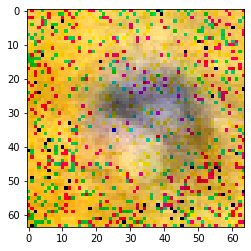

In [48]:
result=autoencoder.predict([arr_inputs_float_val[21].reshape(-1, 64, 64, 3)])[0]
plt.imshow(result)

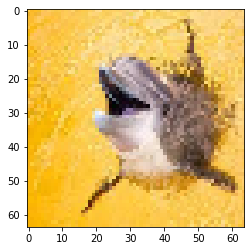

In [49]:
plt.imshow(arr_inputs_float_val[21])

In [ ]:

from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder=tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder=tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(64, activation="sigmoid")])

  def call(self, x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

autoencoder=AnomalyDetector()


In [ ]:
GANS:
!pip install opendatasets --upgrade --quiet

import opendatasets as od

dataset_url = 'https://www.kaggle.com/splcher/animefacedataset'
od.download(dataset_url)

import os

DATA_DIR = './animefacedataset'
print(os.listdir(DATA_DIR)[:10])